# Garmin Data Analysis: steps and floorsClimbed

Shang Lyu

### This file is analyzing the 'steps' and 'floorsClimbed' rows in Garmin Data.

##### Read data from Garmin data files, and put them into dataframes.

In [43]:
import pandas as pd
import glob

# List all the Garmin dataset files
# Note that you have to download the files from Garmin Dataset in Google Drive folder first
file_list_3_month = glob.glob('./Garmin_3_Month/*.csv')
file_list_6_month = glob.glob('./Garmin_6_Month/*.csv')

# Initialize an empty DataFrame to store the extracted data
df_steps_3_month = pd.DataFrame()
df_steps_6_month = pd.DataFrame()
df_floor_3_month = pd.DataFrame()
df_floor_6_month = pd.DataFrame()

# Iterate through the 3 month file list, read each file, and extract the relevant data
for file in file_list_3_month:
    # Read the file into a DataFrame
    df = pd.read_csv(file)
    
    # Extract rows with 'steps' and 'floorsClimbed' from the 'dtype' column
    filtered_data_steps = df[df['data_type'].isin(['steps'])]
    filtered_data_floor = df[df['data_type'].isin(['floorsClimbed'])]
    
    # Append the extracted data to the final DataFrame
    df_steps_3_month = df_steps_3_month.append(filtered_data_steps)
    df_floor_3_month = df_floor_3_month.append(filtered_data_floor)

# Iterate through the 6 month file list, read each file, and extract the relevant data
for file in file_list_6_month:
    # Read the file into a DataFrame
    df = pd.read_csv(file)
    
    # Extract rows with 'steps' and 'floorsClimbed' from the 'dtype' column
    filtered_data_steps = df[df['data_type'].isin(['steps'])]
    filtered_data_floor = df[df['data_type'].isin(['floorsClimbed'])]
    
    # Append the extracted data to the final DataFrame
    df_steps_6_month = df_steps_6_month.append(filtered_data_steps)
    df_floor_6_month = df_floor_6_month.append(filtered_data_floor)

# Reset the index of the extracted_data DataFrame
df_steps_3_month.reset_index(drop=True, inplace=True)
df_steps_6_month.reset_index(drop=True, inplace=True)
df_floor_3_month.reset_index(drop=True, inplace=True)
df_floor_6_month.reset_index(drop=True, inplace=True)


C:\Users\Shang Lyu\AppData\Local\Temp\ipykernel_41112\126130963.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_steps_3_month = df_steps_3_month.append(filtered_data_steps)
C:\Users\Shang Lyu\AppData\Local\Temp\ipykernel_41112\126130963.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_floor_3_month = df_floor_3_month.append(filtered_data_floor)
C:\Users\Shang Lyu\AppData\Local\Temp\ipykernel_41112\126130963.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_steps_3_month = df_steps_3_month.append(filtered_data_steps)
C:\Users\Shang Lyu\AppData\Local\Temp\ipykernel_41112\126130963.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

##### Visualize the dataframe. 

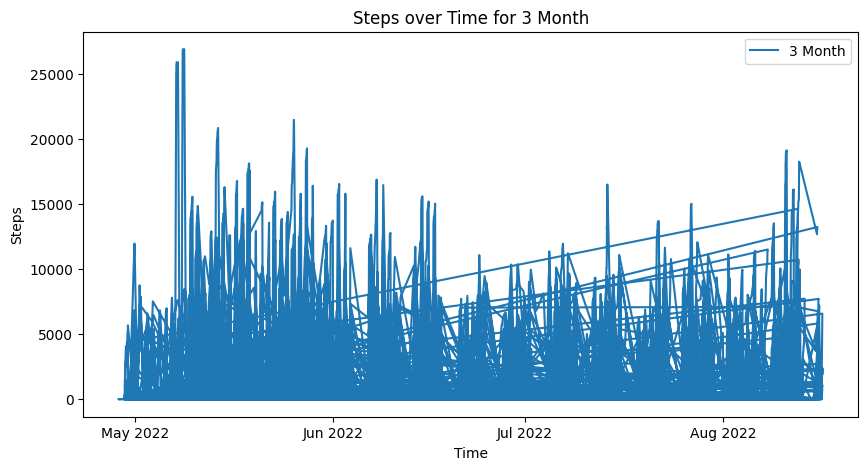

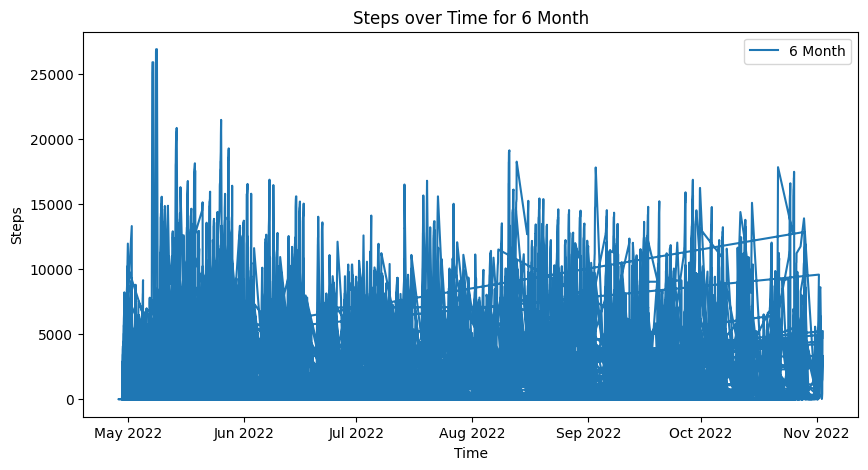

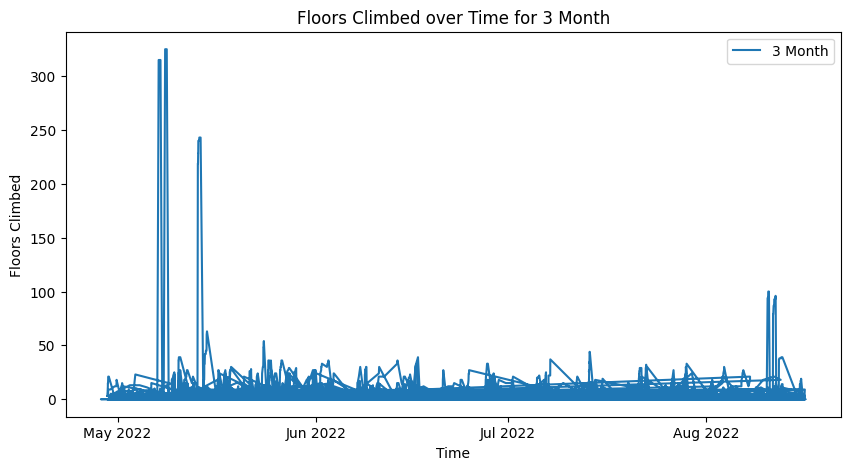

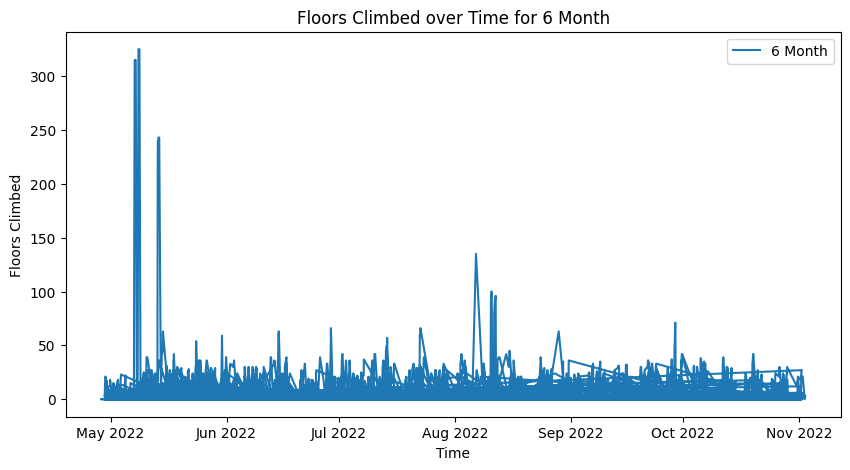

In [44]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert 'dte_tme' column to datetime objects
df_steps_3_month['dte_tme'] = pd.to_datetime(df_steps_3_month['dte_tme'])
df_steps_6_month['dte_tme'] = pd.to_datetime(df_steps_6_month['dte_tme'])
df_floor_3_month['dte_tme'] = pd.to_datetime(df_floor_3_month['dte_tme'])
df_floor_6_month['dte_tme'] = pd.to_datetime(df_floor_6_month['dte_tme'])

# Line plots for steps
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_steps_3_month['dte_tme'], df_steps_3_month['val'], label='3 Month')
ax.set(xlabel='Time', ylabel='Steps', title='Steps over Time for 3 Month')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.legend()
plt.show()

# Line plots for steps
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_steps_6_month['dte_tme'], df_steps_6_month['val'], label='6 Month')
ax.set(xlabel='Time', ylabel='Steps', title='Steps over Time for 6 Month')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.legend()
plt.show()

# Line plots for floors climbed
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_floor_3_month['dte_tme'], df_floor_3_month['val'], label='3 Month')
ax.set(xlabel='Time', ylabel='Floors Climbed', title='Floors Climbed over Time for 3 Month')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.legend()
plt.show()

# Line plots for floors climbed
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_floor_6_month['dte_tme'], df_floor_6_month['val'], label='6 Month')
ax.set(xlabel='Time', ylabel='Floors Climbed', title='Floors Climbed over Time for 6 Month')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.legend()
plt.show()


#### Analyze the changes between 3 months and 6 months for each data type. 

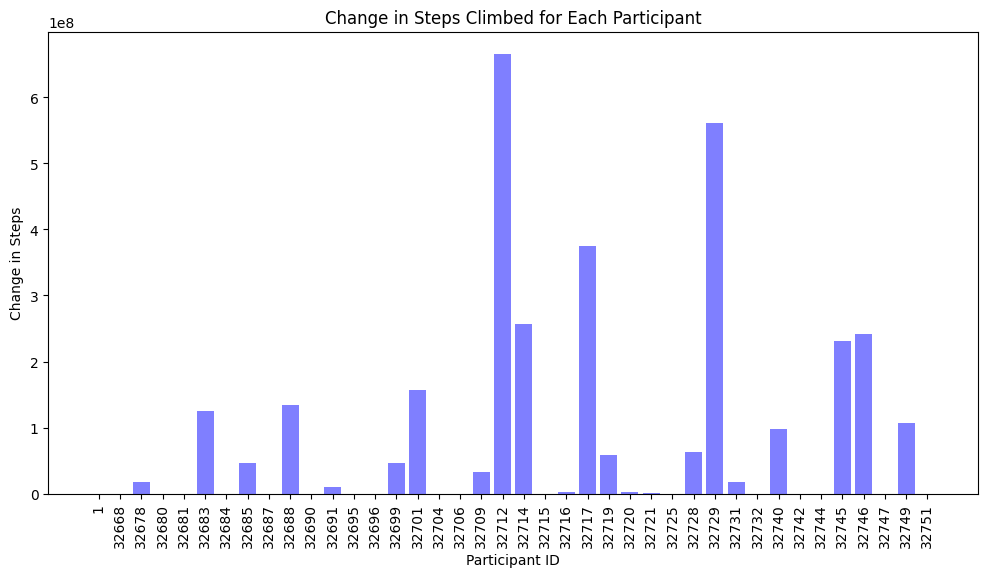

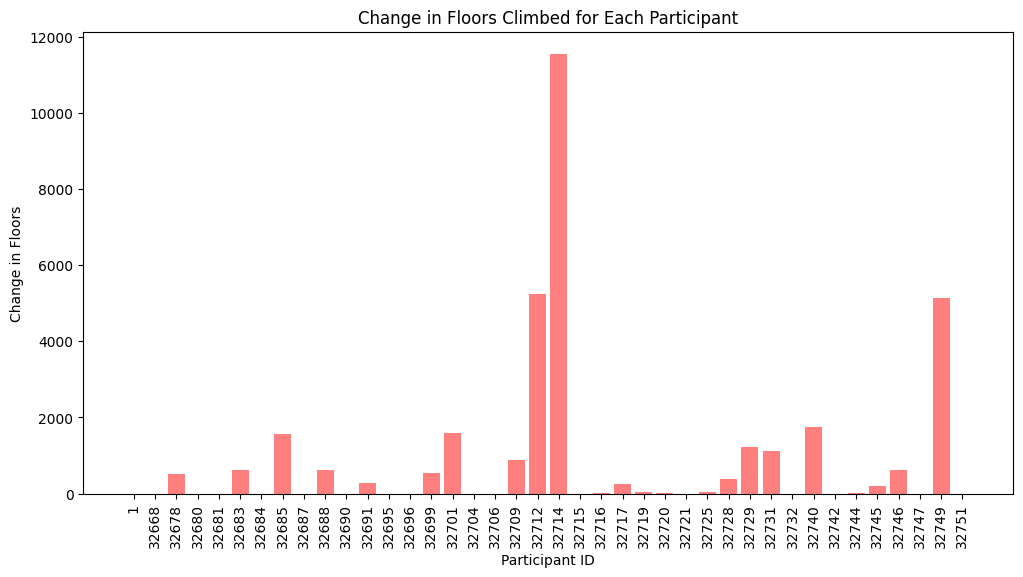

In [45]:
# Calculate the total steps and floors climbed for each participant in the 3-month and 6-month datasets
total_steps_3_month = df_steps_3_month.groupby('rsp_id')['val'].sum()
total_steps_6_month = df_steps_6_month.groupby('rsp_id')['val'].sum()

total_floors_3_month = df_floor_3_month.groupby('rsp_id')['val'].sum()
total_floors_6_month = df_floor_6_month.groupby('rsp_id')['val'].sum()

# Calculate the change in steps and floors climbed for each participant
steps_change = total_steps_6_month - total_steps_3_month
floors_change = total_floors_6_month - total_floors_3_month

# Drop any rows with missing data (e.g., due to participant attrition)
steps_change.dropna(inplace=True)
floors_change.dropna(inplace=True)

# Create a figure and axis object for steps
fig_steps, ax_steps = plt.subplots(figsize=(12, 6))

# Plot the steps change
ax_steps.bar(steps_change.index.astype(int).astype(str), steps_change.values, color='blue', alpha=0.5)

# Add axis labels and title
ax_steps.set_xlabel('Participant ID')
ax_steps.set_ylabel('Change in Steps')
ax_steps.set_title('Change in Steps Climbed for Each Participant')

# Rotate x-axis labels
plt.setp(ax_steps.get_xticklabels(), rotation=90)

# Create a figure and axis object for floors
fig_floors, ax_floors = plt.subplots(figsize=(12, 6))

# Plot the floors change
ax_floors.bar(floors_change.index.astype(int).astype(str), floors_change.values, color='red', alpha=0.5)

# Add axis labels and title
ax_floors.set_xlabel('Participant ID')
ax_floors.set_ylabel('Change in Floors')
ax_floors.set_title('Change in Floors Climbed for Each Participant')

# Rotate x-axis labels
plt.setp(ax_floors.get_xticklabels(), rotation=90)

# Show the plots
plt.show()

##### Analyze the correaltion between steps and floor climed.

In [46]:
# Merge steps and floors data into a single DataFrame
steps_data = pd.concat([df_steps_3_month, df_steps_6_month])
floors_data = pd.concat([df_floor_3_month, df_floor_6_month])

# Group the data by participant ID and sum the values
total_steps = steps_data.groupby('rsp_id')['val'].sum()
total_floors = floors_data.groupby('rsp_id')['val'].sum()

# Combine the total steps and total floors data into a single DataFrame
merged_data = pd.DataFrame({'total_steps': total_steps, 'total_floors': total_floors})

# Calculate the correlation between steps and floors
correlation = merged_data['total_steps'].corr(merged_data['total_floors'])

print("Correlation between steps and floors:", correlation)


Correlation between steps and floors: 0.6974595032226854


##### Analyze the impact of attrition.

In [47]:
participants_3_month = df_floor_3_month['rsp_id'].nunique()
participants_6_month = df_floor_6_month['rsp_id'].nunique()

print(f"Participants at 3 months: {participants_3_month}")
print(f"Participants at 6 months: {participants_6_month}")

attrition_rate = (participants_3_month - participants_6_month) / participants_3_month * 100
print(f"Attrition rate: {attrition_rate:.2f}%")


Participants at 3 months: 40
Participants at 6 months: 46
Attrition rate: -15.00%


In [48]:
# Calculate the mean and standard deviation for the steps and floors climbed data
mean_steps_3_month = total_steps_3_month.mean()
std_steps_3_month = total_steps_3_month.std()
mean_steps_6_month = total_steps_6_month.mean()
std_steps_6_month = total_steps_6_month.std()

mean_floors_3_month = total_floors_3_month.mean()
std_floors_3_month = total_floors_3_month.std()
mean_floors_6_month = total_floors_6_month.mean()
std_floors_6_month = total_floors_6_month.std()

# Compare the means and standard deviations
print(f"Mean steps at 3 months: {mean_steps_3_month:.2f}, at 6 months: {mean_steps_6_month:.2f}")
print(f"Standard deviation of steps at 3 months: {std_steps_3_month:.2f}, at 6 months: {std_steps_6_month:.2f}")
print(f"Mean floors climbed at 3 months: {mean_floors_3_month:.2f}, at 6 months: {mean_floors_6_month:.2f}")
print(f"Standard deviation of floors climbed at 3 months: {std_floors_3_month:.2f}, at 6 months: {std_floors_6_month:.2f}")


Mean steps at 3 months: 153519233.93, at 6 months: 286820284.48
Standard deviation of steps at 3 months: 269245952.64, at 6 months: 425446646.79
Mean floors climbed at 3 months: 2262.85, at 6 months: 5482.07
Standard deviation of floors climbed at 3 months: 5164.67, at 6 months: 13307.05


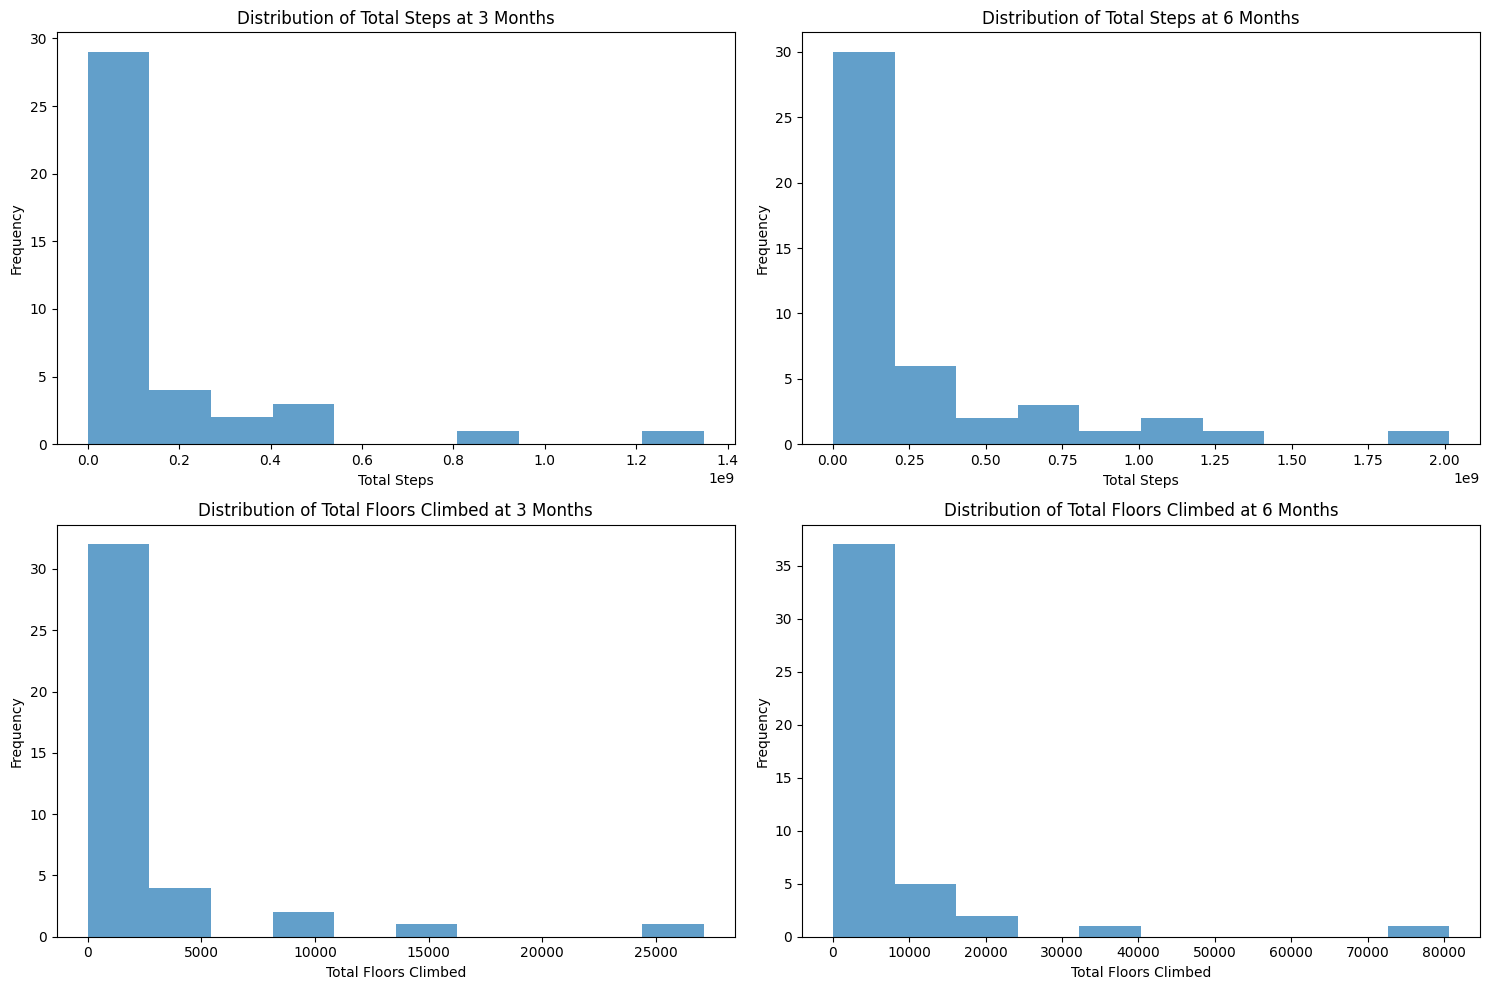

In [49]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0, 0].hist(total_steps_3_month, bins=10, alpha=0.7)
ax[0, 0].set(xlabel='Total Steps', ylabel='Frequency', title='Distribution of Total Steps at 3 Months')

ax[0, 1].hist(total_steps_6_month, bins=10, alpha=0.7)
ax[0, 1].set(xlabel='Total Steps', ylabel='Frequency', title='Distribution of Total Steps at 6 Months')

ax[1, 0].hist(total_floors_3_month, bins=10, alpha=0.7)
ax[1, 0].set(xlabel='Total Floors Climbed', ylabel='Frequency', title='Distribution of Total Floors Climbed at 3 Months')

ax[1, 1].hist(total_floors_6_month, bins=10, alpha=0.7)
ax[1, 1].set(xlabel='Total Floors Climbed', ylabel='Frequency', title='Distribution of Total Floors Climbed at 6 Months')

plt.tight_layout()
plt.show()
